In [2]:
import numpy as np
import pandas as pd
import json

<div style="background-color: #711012; padding: 10px 0; text-align: center;">
    <h2 style="color: white; font-family: Roboto; font-weight: bold;">STEP 1: Load the Dataset using <code>json</code></h2>
</div>


In [3]:
data_list = []
with open('/mnt/data/public/arxiv/arxiv-metadata-oai-snapshot.json', 'r') as file:
    for line in file:
        data = json.loads(line)
        data_list.append(data)

In [10]:
# Make a dataframe
df = pd.DataFrame(data_list)

In [11]:
# Display a sample of the dataframe
df.head(3)
df.shape

(2412624, 14)

<div style="background-color: #711012; padding: 10px 0;">
    <center>
        <h2 style="color: white; font-family: Roboto; font-weight: bold;">STEP 2: Create a column for the year by extracting the date of the first version
        </h2>
    </center>
</div>




In [6]:
# Create a year column (extract from version 1)
df['year'] = df.versions.apply(lambda x: x[0]['created'])
df['year'] = pd.to_datetime(df['year']).dt.year

<div style="background-color: #711012; padding: 10px 0; text-align: center;">
    <h2 style="color: white; font-family: Roboto; font-weight: bold;">STEP 3: Filter the dataset by selecting specific categories</h2>
</div>




Next, we only select categories under Computer Science, Mathematics, and Statistics. These three categories are considered the tenets of data science, as illustrated in Drew Conway's Diagram of Data Science (see Figure 1). 

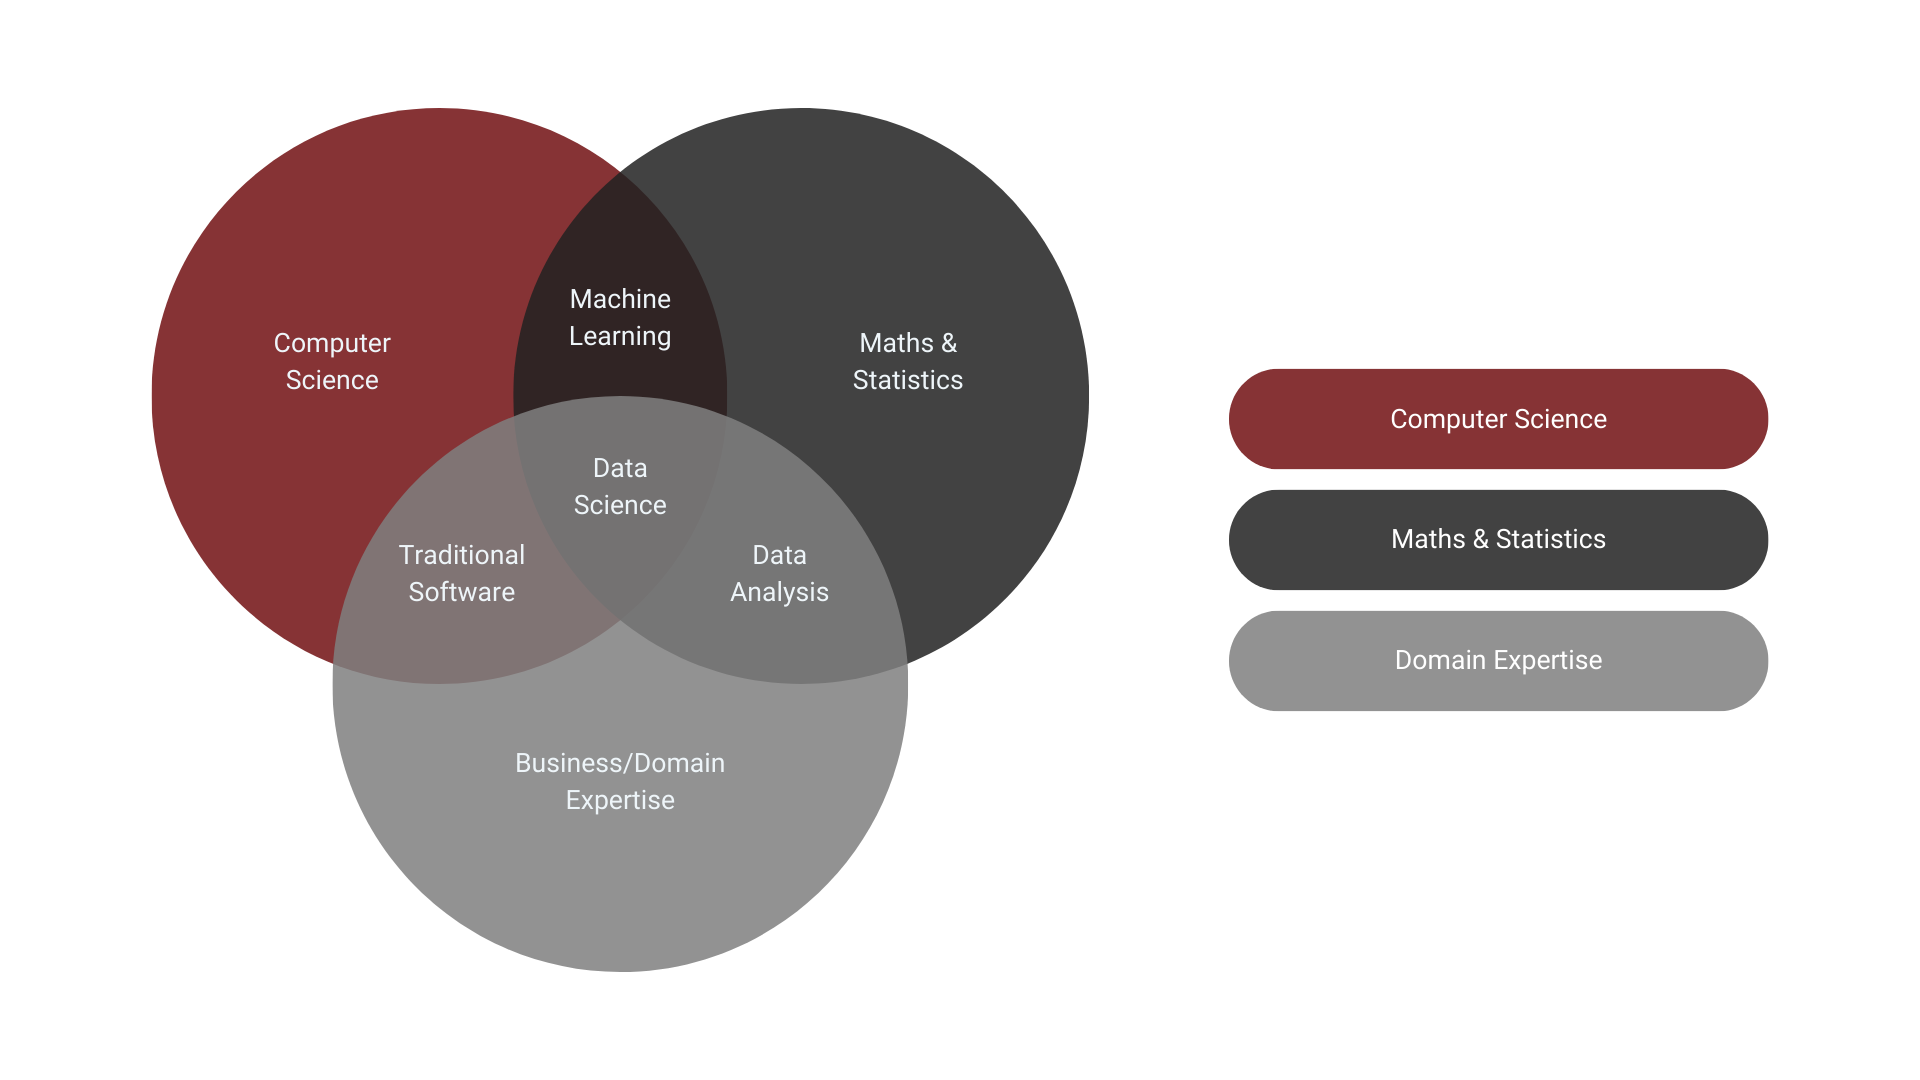

<center><b>Figure 1.</b>Drew Conway's Diagram of Data Science</center>

To further limit the scope of this study, we select only specific subcategories under the main categories to align our focus on the field of data science. The description of the final categories considered in this exploration are as follows:

| Category  | Description                                                                                                                         |
|-----------|-------------------------------------------------------------------------------------------------------------------------------------|
| `cs.AI`     | Artificial Intelligence (AI) - Covers all areas of AI except Vision, Robotics, Machine Learning, Multiagent Systems, and Computation and Language (Natural Language Processing), which have separate subject areas. In particular, includes Expert Systems, Theorem Proving (although this may overlap with Logic in Computer Science), Knowledge Representation, Planning, and Uncertainty in AI. Roughly includes material in ACM Subject Classes I.2.0, I.2.1, I.2.3, I.2.4, I.2.8, and I.2.11.                   |
| `cs.LG`     | Machine Learning - Papers on all aspects of machine learning research (supervised, unsupervised, reinforcement learning, bandit problems, and so on) including also robustness, explanation, fairness, and methodology. cs.LG is also an appropriate primary category for applications of machine learning methods.                                                                                                                                                                          |
| `cs.NE`     | Neural and Evolutionary Computing - Covers neural networks, connectionism, genetic algorithms, artificial life, adaptive behavior. Roughly includes some material in ACM Subject Class C.1.3, I.2.6, I.5.                                                                                         |
| `cs.IR`     | Information Retrieval - Covers indexing, dictionaries, retrieval, content and analysis. Roughly includes material in ACM Subject Classes H.3.0, H.3.1, H.3.2, H.3.3, and H.3.4.                                            |
| `cs.DB`     | Databases - Covers database management, datamining, and data processing. Roughly includes material in ACM Subject Classes E.2, E.5, H.0, H.2, and J.1.                                                               |
| `cs.CV`     | Computer Vision and Pattern Recognition - Covers image processing, computer vision, pattern recognition, and scene understanding. Roughly includes material in ACM Subject Classes I.2.10, I.4, and I.5.                                          |
| `cs.CY`     | Computers and Society - Covers impact of computers on society, computer ethics, information technology and public policy, legal aspects of computing, computers and education. Roughly includes material in ACM Subject Classes K.0, K.2, K.3, K.4, K.5, and K.7.            |
| `cs.CL`     | Computation and Language - Covers natural language processing. Roughly includes material in ACM Subject Class I.2.7. Note that work on artificial languages (programming languages, logics, formal systems) that does not explicitly address natural-language issues broadly construed (natural-language processing, computational linguistics, speech, text retrieval, etc.) is not appropriate for this area.                                                                  |
| `math.OC`   | Optimization and Control - Operations research, linear programming, control theory, systems theory, optimal control, game theory                                                                                            |
| `math.PR`   | Probability - Theory and applications of probability and stochastic processes: e.g. central limit theorems, large deviations, stochastic differential equations, models from statistical mechanics, queuing theory |
| `math.ST`   | Statistics Theory - Applied, computational and theoretical statistics: e.g. statistical inference, regression, time series, multivariate analysis, data analysis, Markov chain Monte Carlo, design of experiments, case studies                                                                       |
| `stat.ML`   | Machine Learning - Covers machine learning papers (supervised, unsupervised, semi-supervised learning, graphical models, reinforcement learning, bandits, high dimensional inference, etc.) with a statistical or theoretical grounding                                                       |
| `stat.TH`   | Statistics Theory (alias for math.ST) - Asymptotics, Bayesian Inference, Decision Theory, Estimation, Foundations, Inference, Testing.                                                                      |
| `stat.CO`   | Computation - Algorithms, Simulation, Visualization                                                                                                                                                              |
<center><b>Table 1.</b> arXiv's Category Taxonomy</center>

In [7]:
categories = ['cs.AI', 'cs.ML', 'cs.IR', 'math.ST', 'math.PR', 'math.NA', 
              'stat.ML', 'stat.TH', 'stat.CO']
pattern = '|'.join(categories)
df_prefinal = df[df['categories'].str.contains(pattern)]

<div style="background-color: #711012; padding: 10px 0; text-align: center;">
    <h2 style="color: white; font-family: Roboto; font-weight: bold;">STEP 3: Clean the dataset</h2>
</div>




Let's clean further the dataset and remove irrelevant rows: `journal-ref`, `doi`, `report-no`,. `submitter`, `comments`, `license`, `update`, `versions`, `authors_parsed`. This is the resulting final dataframe.

In [8]:
cols_to_retain = ['id', 'title', 'authors', 'abstract', 'year', 'categories']
final_df = df_prefinal.loc[:, df_prefinal.columns.isin(cols_to_retain)]
final_df.set_index('id', inplace=True)
final_df.head(3)

,authors,title,categories,abstract,year
id,,,,,
0704.0019,Norio Konno,Approximation for extinction probability of th...,math.PR math.AG,In this note we give a new method for gettin...,2007
0704.0022,Simon J.A. Malham and Anke Wiese,Stochastic Lie group integrators,math.NA,We present Lie group integrators for nonline...,2007
0704.0028,P\'eter E. Frenkel,"Pfaffians, hafnians and products of real linea...",math.CA math.PR,We prove pfaffian and hafnian versions of Li...,2007


In [9]:
final_df.to_csv('final_df.csv', index=False)